# Razumova Model of Stiffness/ Distortion
## Notebook prepared by: K.J. McCabe

Here we will work through the stiffness distortion crossbridge model proposed in 1999 by Maria V. Razumova, Anna E. Bukatina, and Kenneth B. Campbell.

The model represents a half sarcomere, and relies on the assumption that the force generated in a given sarcomere unit is equal to the sum of forces of each individual crossbridge (XB) in the region. The model also represents force as the product of the stiffness of all parallel cross bridges and their average distortion.

So, we can represent the force of a half sarcomere as: 
$$\begin{align}
F(t) = e\sum_{i=1}^{n}A_i(t)x_i(t)
\end{align}
$$
Where e is the stiffness of a XB, $A_i(t)$ is the number of XBs in the $i$th state, and $x_i(t)$ average distortion of XBs in the $i$th state.

Both $A_i$ and $x_i$ vary in time, and should depend on a number of important mechanisms such as Calcium availability, filament overlap, regulatory protein dynamics, and XB kinetics. For this model, the authors focused on the latter 2 mechanisms and held filament overlap and $[Ca^{2+}]$ constant.

<img src="fig/Razumova_Schematic.png" width=400></img>
**Figure** The model has 4 main states, outlined in this schematic. $R_{off}$ represents a regulatory unit where the thin filament is inactive. D is the detached state, with active thin filament. $A_{1}$ is attached XB pre-powerstroke, and $A_{1}$ is attached XB post-powerstroke.

Using inspection and our knowledge of mass-action kinetics, we can write ODEs for the system:
$$\begin{align}
\\
\dot{D}(t) = k_{on}R_{off}(t)+f'A_1(t)+gA_2(t)-(k_off+f)D(t)\\
\dot{A_1}(t) = fD(t)+ h'A_2(t)-(f'+h)A_1(t)\\
\dot{A_2}(t) = hA_1(t)-(h'+g)A_2(t)\\
\\
\end{align}
$$
Mass conservation tells us that $R_{off}(t) = R_T-{D}(t)- A_1(t)-A_2(t)$ where $R_T$ represents the total number of crossbridges for a particular filament overlap fraction. Though the model does not consider filament overlap, one could introduce length-dependence into the model by adjusting $R_T$.

### ODEs for time-dependent XB distortion
We must also write ODEs for $x_1(t)$ and $x_2(t)$, which represent the average distortion of the XBs in the pre- and post-powerstroke state, respectively. 

The authors outline 2 potential mechanisms for XB distortion: Distortion due to powerstroke, and distortion due to filament sliding. 
<img src="fig/distortion_mechanisms.png" width=400></img>

In isometric conditions, the power stroke induces XB distortion equal to the stretching of s spring by an **average of $x_0$** when in the $A_2$ state. The distortion is lost when the XB detaches or returns to $A_1$. Also, when SL changes during a powerstroke you can see the changes in $x_2$ related to $x_0$.

Collectively, the distortion for state $A_2$ can be calculated as:
$$\begin{align}
\\
X_2(t) = A_2(t)x_2(t)\\
\\
\end{align}
$$

So to calculate $X_2(t+\Delta t)$ we must sum up the contribution of $\Delta SL$, added distortion due to new $A_2$ XBs, and lost distortion due to detachment of post-powerstroke XBs. In other words,
$$\begin{align}
\\
\dot{X_2(t)} = A_2(t)\Delta \dot{SL}(t) + [h A_1(t)]x_0 - [(g+h')A_2(t)]x_2(t)
\\
\end{align}
$$

Since $\dot{X_2(t)} = \dot{A_2}(t)x_2(t)+{A_2}(t)\dot{x_2}(t)$, we can solve this equation for $\dot{x_2}(t)$ as follows:

$$\begin{align}
\\
\dot{A_2}(t)x_2(t)+{A_2}(t)\dot{x_2}(t) = A_2(t)\Delta \dot{SL}(t) + [h A_1(t)]x_0 - [(g+h')A_2(t)]x_2(t)\\
\dot{x_2}(t) = -h\frac{A_1(t)}{A_2(t)}[{x_2}(t)-x_0]+\dot{SL}(t)
\\
\end{align}
$$

In a similar fashion, we can derive $\dot{x_1}(t)$ to be:
$$\begin{align}
\dot{x_1}(t) = -[f\frac{D(t)}{A_2(t)}+h'\frac{A_2(t)}{A_1(t)}]x_1(t)+\dot{SL}(t)
\\
\end{align}
$$


### Rate coefficient distortion dependence
From experimental work, it has been observed that the rates of XB cycling can depend on the strain of the XBs. For this reason, the model creators empirically added strain dependence in the detachment rate: 
$$\begin{align}
g=g_0e^{\sigma (x_2-x_0)^2}
\end{align}\\
$$
where $g_0$ represents detachment rate for isometric conditions, and $\sigma$ represents the distortional dependence (how much g should change based on strain -- when $\sigma$=0, no strain-dependence). 

**Important note about $\sigma$** The authors found retrospectively that $\sigma$ should take a small value when $x_2>x_0$ than when $x_2<x_0$. Therefore we should set $\sigma$ as a piecewise function which is dependent on the value of $x_2$ compared with $x_0$

It is important to note here that the relationship is not thermodynamically or biophysically based. Rather, a function was arbitrarily formulated to achieve parametric succinctness and to allow the model to serve as a basic approximation of a mean-field theory system rather than requiring the use of spatially explicit PDEs. 

## Cooperative effects and rate coefficients

The model allows for one mechanism of cooperativity - XB-XB, or the process by which the binding of a crossbridge facilitates the binding of the XB in the neighboring Regulatory Unit. When a XB is bound, the transition energy from the D (Detached) state to the A1 (pre-powerstroke) state is modified. This neighboring effect is represented in f by:

<img src="fig/Neighbor_rates_Razumova.png" width=400></img>
Where $f_r$ represents the value of f when no neighbors have XBs bound.

Using these constraints, we can derive an equation for $f$:

$$\begin{align}
f=f_r\{1+\lambda^{A_1}[e^{x_1/x_0(\nu-1)}-1]+\lambda^{A_2}[e^{x_2/x_0(\nu-1)}-1]\}^2\\
\lambda^{A_1} = A_1/R_T\\
\lambda^{A_2} = A_2/R_T\\
\end{align}\\
$$
Where $\lambda^{A_1}$ and $\lambda^{A_2}$ are probabilities of finding a neighbor in one of the attached states, the exponential terms arise from activation energy, and $\nu$ is a number $\geq 1$ controlling the cooperative impact of one neighbor on another (when there is no cooperativity, $\nu = 1$).

In [160]:
# Import necessary packages
from math import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import ode
from scipy.special import expit
%matplotlib inline

#define necessary functions
def custom_piecewise(cases):
    """Compute result of a piecewise function"""
    return np.select(cases[0::2],cases[1::2])

In [161]:
#Set initial conditions
D_0 = 0.005;   
A1_0 = 0.005; 
A2_0 = 0.005; 
x1_0 = 1e-16;
x2_0 = 1e-16;
SL_0 = 2;

#set constants 
x_0 = 1e-16;
k_on = 400; #rate from nonpermissive to permissive, detached RU.
k_off = 50; 
f_0 = 50; # attachment rate
f_prime_0 = 400; 
h_0 = 8;
h_prime_0 = 6;
g_0 = 4;
nu = 3;
sigma_minus = 1;
sigma_plus = 8;
R_T = 1;
e_cb = 1.5;
f_r=1;
lambda_A2 = 1;
kambda_A1= 1;
params = (x_0, k_on, k_off, f_0, f_prime_0, h_0, h_prime_0, g_0, nu, sigma_minus, sigma_plus, R_T, e_cb)

In [162]:
# Implement the right-hand-side of the system

def rhs(y, t, x_0, k_on, k_off, f, f_prime, h, h_prime, g, nu, sigma_m, sigma_p, R_T, e_cb):
    D, A_1, A_2, x_1, x_2, SL = y

    dD_dt = k_on*(R_T - D - A_1 - A_2)+f_prime*A_1+g*A_2-(k_off+f)*D
    dA1_dt = f*D+h_prime*A_2-(f_prime+h)*A_2
    dA2_dt = h*A_1-(h_prime+g)*A_2
    dSL_dt = 0
    dx1_dt = (f*(D/A_1)+h_prime*(A_2/A_1))*x_1 + dSL_dt
    dx2_dt = -h*(A_1/A_2)*(x_2-x_0)+dSL_dt
    
    
    return [dD_dt, dA1_dt, dA2_dt, dSL_dt, dx1_dt, dx2_dt]

# Make a vector of time points where solutions are to be computed
time = np.linspace(0, 10, 300)

# Define the initial condition
y_0 = (D_0, A1_0, A2_0, x1_0, x2_0, SL_0)


# Call the ODE solver
solutions = odeint(rhs, y_0, time, params)
D, A_1, A_2, x_1, x_2, SL = np.hsplit(solutions, 6)



In [168]:
#compute algebraic portions
sigma    = custom_piecewise([np.greater(x_2 , x_0), sigma_plus, np.less(x_2 , x_0), sigma_minus , True, 0.00000])
g        = g_0*np.exp(sigma*np.power(x_2-x_0,2.00000))
h        = h_0*np.exp(np.power(sigma*x_1,2.000))
h_prime  = h_prime_0*np.exp(sigma*(np.power(x_2,2.00000)-np.power(x_1,2.00000)))
Roff     = R_T - D - A_1 - A_2
lambda_A1=A_1/R_T
lambda_A1=A_2/R_T
f        = f_r*1.00000+lambda_A1*(expit(x_1/x_0*(nu-1.00000))-1.00000)+lambda_A2*np.power((expit(x_2/x_0*(nu-1.00000))-1.00000),2.00000)
f_prime  = f_prime_0*expit(np.power(sigma*x_1,2.00000))
dSL_dt   = custom_piecewise([np.greater(time , 0.00100000) & np.less(time , 0.00200000), 21.2000 , True, 0.00000])
E_1      = R_T*A_1
E_2      = R_T*A_2
F_t      = E_1*x_1+E_2*x_2

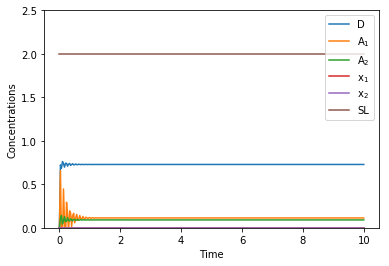

In [169]:
# Plot data with labels
plt.plot(time, D, label=r'D')
plt.plot(time, A_1, label=r'A$_1$')
plt.plot(time, A_2, label=r'A$_2$')
plt.plot(time, x_1, label=r'x$_1$')
plt.plot(time, x_2, label=r'x$_2$')
plt.plot(time, SL, label=r'SL')

# plot
plt.xlabel('Time')
plt.ylabel('Concentrations')
plt.legend()
plt.ylim(0,2.5)

plt.show()